誤差: 0.12127388623276915


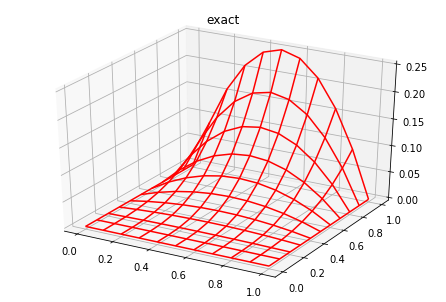

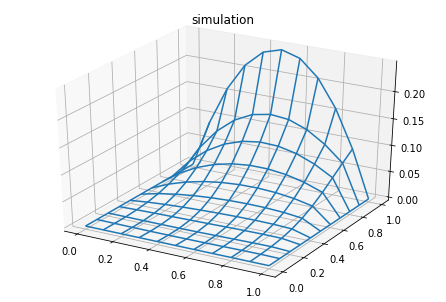

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

num = 11
delta = 1 / (num - 1)
x = np.linspace(0, 1, num)
y = np.linspace(0, 1, num)

b = np.zeros((num, num), dtype='float64')
for i in range(num):
    for j in range(num):
        if i == (num - 1):
            b[i, j] = delta ** 2 * (6 * x[i] * y[j] * (1 - y[j]) - 2 * x[i] ** 3) - y[j] * (
                    1 - y[j])
        else:
            b[i, j] = delta ** 2 * (6 * x[i] * y[j] * (1 - y[j]) - 2 * x[i] ** 3)

b_hat = np.zeros_like(b)
for k in range(num):
    for l in range(num):
        ans = 0
        for i in range(num):
            for j in range(num):
                ans += np.sin(np.pi * i * k / num) * np.sin(np.pi * j * l / num) * b[i, j]
        b_hat[k, l] = ans

u = np.zeros((num, num), dtype='float64')
u_hat = np.zeros_like(u)
for k in range(num):
    for l in range(num):
        if k == 0 and l == 0:
            u_hat[k, l] = 0
        else:
            u_hat[k, l] = 1 / (
                    2 * (np.cos(np.pi * k / num) + np.cos(np.pi * l / num) - 2)) * b_hat[k, l]

for i in range(num):
    for j in range(num):
        if i == 0 or j == 0 or j == (num - 1):
            u[i, j] = 0
        elif i == (num - 1):
            u[i, j] = y[j] * (1 - y[j])
        else:
            ans = 0
            for k in range(num):
                for l in range(num):
                    ans += np.sin(np.pi * i * k / num) * np.sin(np.pi * j * l / num) * u_hat[k, l]
            u[i, j] = (2 / num) ** 2 * ans

ans = np.zeros((num, num), dtype='float64')
for i in range(num):
    for j in range(num):
        ans[i, j] = x[i] ** 3 * y[j] * (1 - y[j])

X, Y = np.meshgrid(x, y)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X, Y, ans, color='r')
ax.set_title('exact')
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X, Y, u)
ax.set_title('simulation')

print(f'誤差: {np.linalg.norm(u - ans)}')